/Users/karthikeyans/anaconda3/lib/python3.10/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
/Users/karthikeyans/anaconda3/lib/python3.10/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


Data written to csv.
Accuracy: 1.0


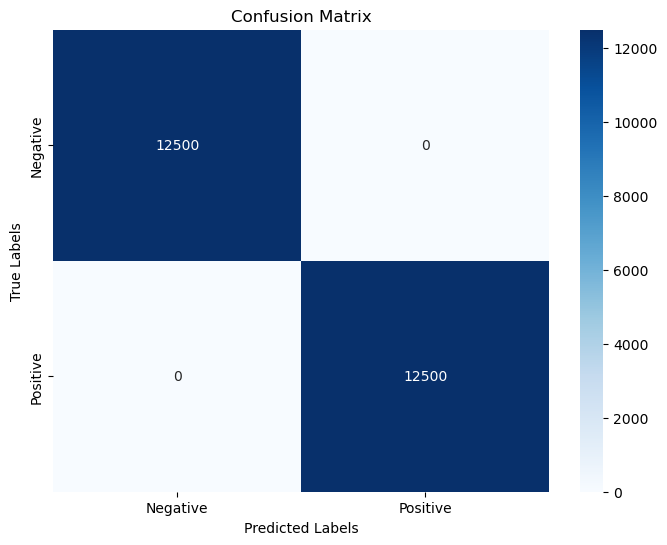

In [1]:
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
import re
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
import pandas as pd
import numpy as np

def review_to_wordlist(review, remove_stopwords=False):
    review_text = BeautifulSoup(review).get_text()
    review_text = re.sub("[^a-zA-Z]", " ", review_text)
    words = review_text.lower().split()
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
    return words

train = pd.read_csv(os.path.join(os.path.dirname('__main__'), 'Movie_Rec', '/Users/karthikeyans/Downloads/Movie_Rec/labeledTrainData.tsv'), header=0, delimiter="\t", quoting=3)
test = pd.read_csv(os.path.join(os.path.dirname('__main__'), 'Movie_Rec', '/Users/karthikeyans/Downloads/Movie_Rec/TestData.tsv'), header=0, delimiter="\t", quoting=3)

clean_train_review = []

for i in range(0, len(train["review"])):
    clean_train_review.append(" ".join(review_to_wordlist(train["review"][i], True)))

Vectorizer = CountVectorizer(analyzer="word", tokenizer=None, preprocessor=None, stop_words=None, max_features=5000)
train_data_features = Vectorizer.fit_transform(clean_train_review)
train_data_features = train_data_features.toarray()

forest = RandomForestClassifier(n_estimators=100)
forest = forest.fit(train_data_features, train["sentiment"])

clean_test_data = []

for i in range(0, len(test["review"])):
    clean_test_data.append(" ".join(review_to_wordlist(test["review"][i], True)))

test_data_feature = Vectorizer.transform(clean_test_data)
test_data_feature = test_data_feature.toarray()

result = forest.predict(test_data_feature)

output = pd.DataFrame(data={"id": test["id"], "sentiment": result})
output.to_csv(os.path.join(os.path.dirname('__main__'), 'Movie_Rec', '/Users/karthikeyans/Downloads/Movie_Rec/Movie_Sent.csv'), index=False, quoting=3)
print("Data written to csv.")

from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

train_predictions = forest.predict(train_data_features)
conf_matrix = confusion_matrix(train["sentiment"], train_predictions)
accuracy = accuracy_score(train["sentiment"], train_predictions)
print(f"Accuracy: {accuracy}")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
